In [1]:
import pathlib
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# setting paths 
FIGURES_PATH = pathlib.Path("figures/").resolve(strict=True)
RESULTS_PATH = pathlib.Path("results/").resolve(strict=True)
                                               
# suffix and ext
PLATE2_BASENAME = "localhost220513100001_KK22-05-198_FactinAdjusted"
CELLPROFILER_SUFFIX = "_linear_model_cp_features"
PYBASIC_SUFFIX = "_linear_model_cp_features_pb"
EXT = ".tsv"

# data paths
PB_PLATE2_PATH = (RESULTS_PATH / f"{PLATE2_BASENAME}{PYBASIC_SUFFIX}{EXT}").resolve(strict=True)
CP_PLATE2_PATH = (RESULTS_PATH / f"{PLATE2_BASENAME}{CELLPROFILER_SUFFIX}{EXT}").resolve(strict=True)

In [3]:
# loading in data
pb_p2_lmcoeff_df = pd.read_table(PB_PLATE2_PATH)
cp_p2_lmcoeff_df = pd.read_table(CP_PLATE2_PATH)

print("PyBasic Features:",len(pb_p2_lmcoeff_df["feature"]))
print("CellProfiler Features:",len(cp_p2_lmcoeff_df["feature"]))

shared_features = list(set(cp_p2_lmcoeff_df["feature"]).intersection(set(pb_p2_lmcoeff_df["feature"])))
print("shared features:", len(shared_features))

PyBasic Features: 585
CellProfiler Features: 505
shared features: 308


In [4]:
pb_p2_lmcoeff_df.head()

,feature,r2_score,cell_count_coef,treatment_dose_coef
0,Cytoplasm_AreaShape_Compactness,0.044215,-0.000025,-0.078005
1,Cytoplasm_AreaShape_Extent,0.069271,-0.000077,0.096291
2,Cytoplasm_AreaShape_FormFactor,0.095343,-0.000160,0.111922
3,Cytoplasm_AreaShape_MajorAxisLength,0.083236,-0.001751,0.014357
4,Cytoplasm_AreaShape_Perimeter,0.045651,-0.001369,-0.011158


In [5]:
cp_p2_lmcoeff_df.head()

,feature,r2_score,cell_count_coef,treatment_dose_coef
0,Cytoplasm_AreaShape_Compactness,0.026470,0.000403,-0.050196
1,Cytoplasm_AreaShape_FormFactor,0.070085,-0.000828,0.074347
2,Cytoplasm_AreaShape_MajorAxisLength,0.059390,-0.001345,0.025609
3,Cytoplasm_AreaShape_MinorAxisLength,0.061127,-0.001351,0.027655
4,Cytoplasm_AreaShape_Orientation,0.000086,0.000006,0.003491


In [6]:
## Scatter plot among all features 

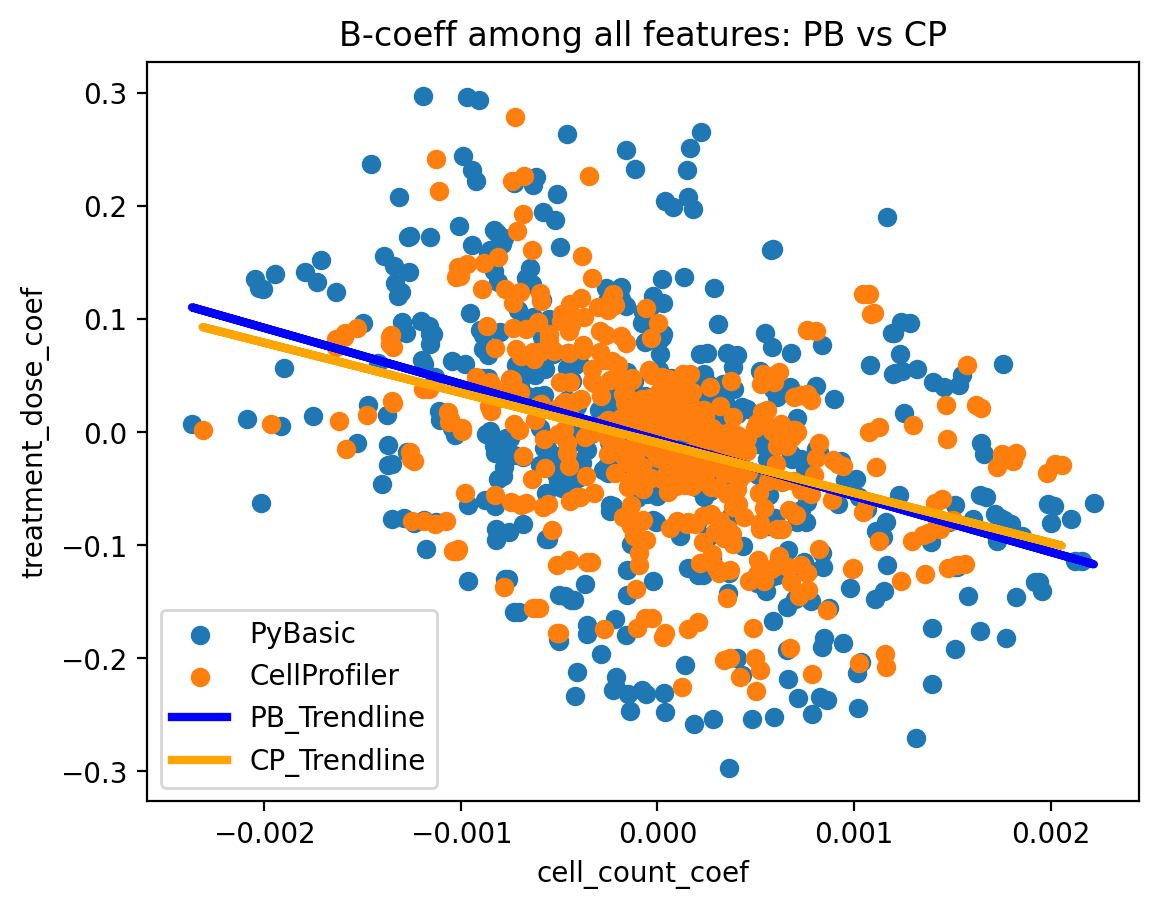

In [7]:
plt.figure(dpi=200)

# Fit a linear regression line
pb_coefficients = np.polyfit(pb_p2_lmcoeff_df['cell_count_coef'], pb_p2_lmcoeff_df['treatment_dose_coef'], deg=1)
pb_line = np.poly1d(pb_coefficients)
cp_coefficients = np.polyfit(cp_p2_lmcoeff_df['cell_count_coef'], cp_p2_lmcoeff_df['treatment_dose_coef'], deg=1)
cp_line = np.poly1d(cp_coefficients)

plt.scatter(pb_p2_lmcoeff_df['cell_count_coef'], pb_p2_lmcoeff_df['treatment_dose_coef'], label='PyBasic')
plt.scatter(cp_p2_lmcoeff_df['cell_count_coef'], cp_p2_lmcoeff_df['treatment_dose_coef'], label='CellProfiler')
plt.plot(pb_p2_lmcoeff_df['cell_count_coef'], pb_line(pb_p2_lmcoeff_df['cell_count_coef']), color="blue", label="PB_Trendline", linewidth=3.0)
plt.plot(cp_p2_lmcoeff_df['cell_count_coef'], cp_line(cp_p2_lmcoeff_df['cell_count_coef']), color="orange", label="CP_Trendline", linewidth=3.0)
plt.title("B-coeff among all features: PB vs CP")
plt.xlabel('cell_count_coef')
plt.ylabel('treatment_dose_coef')
plt.legend()
plt.show()

## Scatter plot among shared features 

In [8]:
# now lets only look at the shared features
shared_pb_df = pb_p2_lmcoeff_df[pb_p2_lmcoeff_df["feature"].isin(shared_features)]
shared_cp_df = cp_p2_lmcoeff_df[cp_p2_lmcoeff_df["feature"].isin(shared_features)]

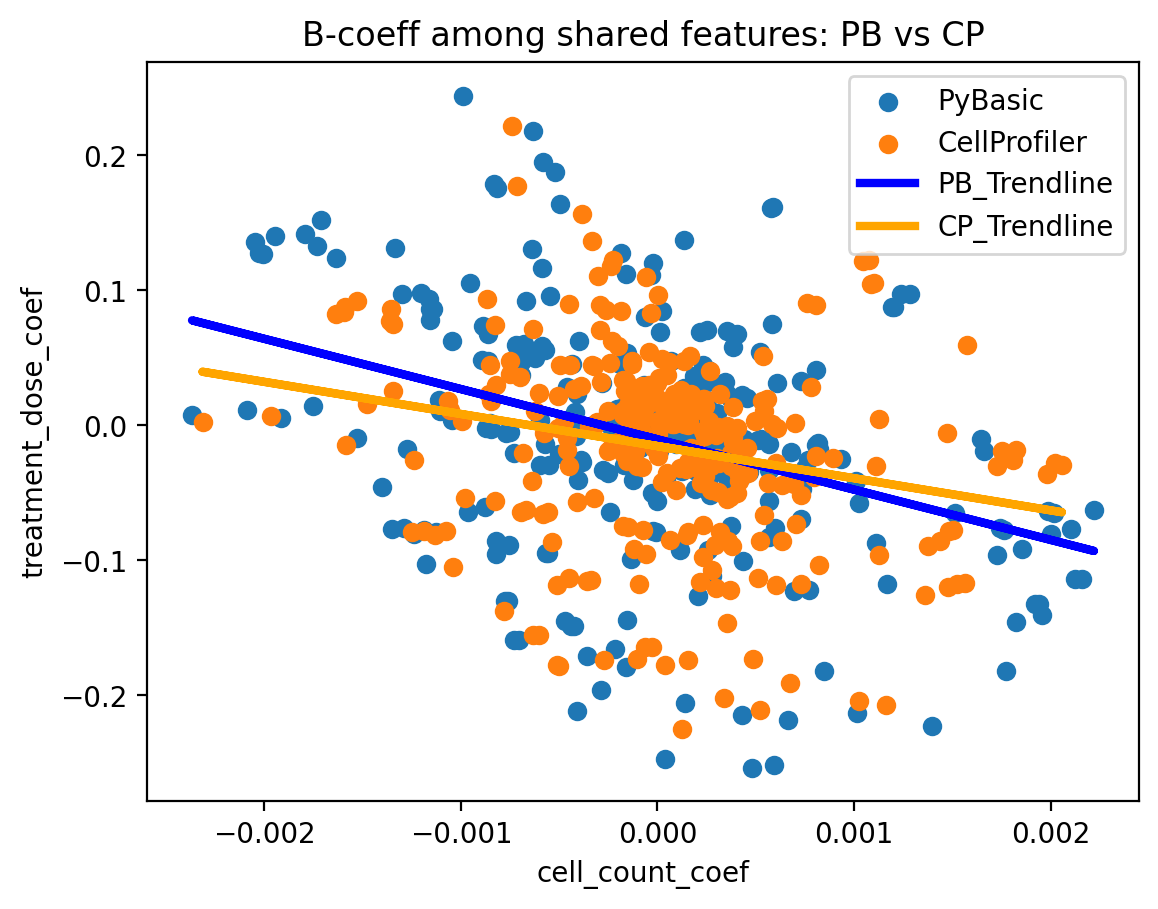

In [9]:
# plotting shared features scatter plot
plt.figure(dpi=200)

# Fit a linear regression line
pb_coefficients = np.polyfit(shared_pb_df['cell_count_coef'], shared_pb_df['treatment_dose_coef'], deg=1)
shared_pb_line = np.poly1d(pb_coefficients)
cp_coefficients = np.polyfit(shared_cp_df['cell_count_coef'], shared_cp_df['treatment_dose_coef'], deg=1)
shared_cp_line = np.poly1d(cp_coefficients)

plt.scatter(shared_pb_df['cell_count_coef'], shared_pb_df['treatment_dose_coef'], label='PyBasic')
plt.scatter(shared_cp_df['cell_count_coef'], shared_cp_df['treatment_dose_coef'], label='CellProfiler')
plt.plot(shared_pb_df['cell_count_coef'], shared_pb_line(shared_pb_df['cell_count_coef']), color="blue", label="PB_Trendline", linewidth=3.0)
plt.plot(shared_cp_df['cell_count_coef'], shared_cp_line(shared_cp_df['cell_count_coef']), color="orange", label="CP_Trendline", linewidth=3.0)
plt.title("B-coeff among shared features: PB vs CP")
plt.xlabel('cell_count_coef')
plt.ylabel('treatment_dose_coef')
plt.legend()
plt.show()

> **Scatter coeff plot among shared features**: Minor difference how on features are being calculated between PyBasic and CellProfiler. 

In [10]:
shared_cp_df

,feature,r2_score,cell_count_coef,treatment_dose_coef
0,Cytoplasm_AreaShape_Compactness,0.026470,0.000403,-0.050196
1,Cytoplasm_AreaShape_FormFactor,0.070085,-0.000828,0.074347
2,Cytoplasm_AreaShape_MajorAxisLength,0.059390,-0.001345,0.025609
5,Cytoplasm_AreaShape_Zernike_0_0,0.028563,-0.000202,0.058909
6,Cytoplasm_AreaShape_Zernike_1_1,0.004290,-0.000030,0.023844
...,...,...,...,...
497,Nuclei_Texture_SumEntropy_ER_3_03_256,0.373749,0.000126,-0.224973
499,Nuclei_Texture_SumEntropy_Mitochondria_3_03_256,0.030291,0.000634,-0.044313
501,Nuclei_Texture_SumVariance_ER_3_03_256,0.059317,-0.000117,-0.091594
502,Nuclei_Texture_SumVariance_Hoechst_3_01_256,0.009135,0.000190,-0.031151


In [11]:
shared_pb_df

,feature,r2_score,cell_count_coef,treatment_dose_coef
0,Cytoplasm_AreaShape_Compactness,0.044215,-0.000025,-0.078005
2,Cytoplasm_AreaShape_FormFactor,0.095343,-0.000160,0.111922
3,Cytoplasm_AreaShape_MajorAxisLength,0.083236,-0.001751,0.014357
6,Cytoplasm_AreaShape_Zernike_0_0,0.051629,0.000024,0.084263
7,Cytoplasm_AreaShape_Zernike_1_1,0.003884,-0.000084,0.021559
...,...,...,...,...
577,Nuclei_Texture_SumEntropy_ER_3_03_256,0.449751,0.000039,-0.247440
579,Nuclei_Texture_SumEntropy_Mitochondria_3_03_256,0.036401,0.000568,-0.055892
581,Nuclei_Texture_SumVariance_ER_3_03_256,0.070080,-0.000136,-0.099116
583,Nuclei_Texture_SumVariance_Hoechst_3_01_256,0.010333,0.000197,-0.033540


## Looking how many features are being capture per compartment

In [12]:
# lets look at the feature collection between PyBasic vs CellProfiler
cp_cyto_df = cp_p2_lmcoeff_df[cp_p2_lmcoeff_df["feature"].str.startswith("Cytoplasm")]
cp_cell_df = cp_p2_lmcoeff_df[cp_p2_lmcoeff_df["feature"].str.startswith("Cells")]
cp_nuc_df = cp_p2_lmcoeff_df[cp_p2_lmcoeff_df["feature"].str.startswith("Nuclei")]

pb_cyto_df = pb_p2_lmcoeff_df[pb_p2_lmcoeff_df["feature"].str.startswith("Cytoplasm")]
pb_cell_df = pb_p2_lmcoeff_df[pb_p2_lmcoeff_df["feature"].str.startswith("Cells")]
pb_nuc_df = pb_p2_lmcoeff_df[pb_p2_lmcoeff_df["feature"].str.startswith("Nuclei")]

In [13]:
labels = ["Cytoplasm", "Cells", "Nuclei"]
total_cp_feats = [len(cp_cyto_df), len(cp_cell_df), len(cp_nuc_df)]
total_pb_feats = [len(pb_cyto_df), len(pb_cell_df), len(pb_nuc_df)]

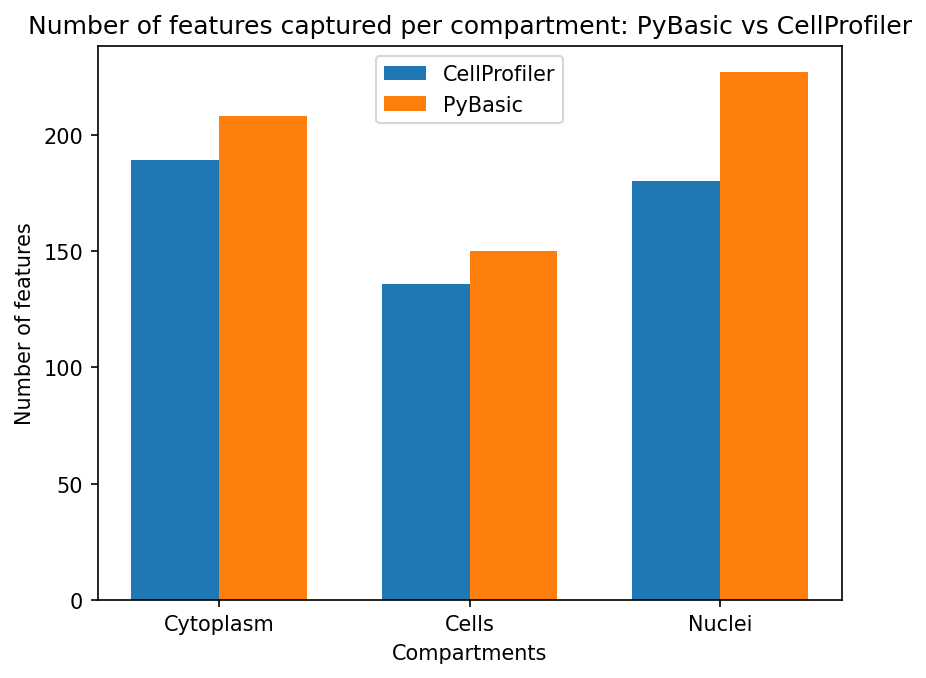

In [14]:
plt.figure(dpi=150)
# Width of each bar
bar_width = 0.35

# Calculate the offset for each bar group
offset = np.arange(len(labels))

# Plotting side-by-side bar plots
plt.title("Number of features captured per compartment: PyBasic vs CellProfiler")
plt.bar(offset, total_cp_feats, width=bar_width, label="CellProfiler")
plt.bar(offset + bar_width, total_pb_feats, width=bar_width, label="PyBasic")

plt.xlabel("Compartments")
plt.ylabel("Number of features")
plt.xticks(offset + bar_width/2, labels)
plt.legend();

> From this it seems like `PyBasic` is capturing more features that `CellProfiler` through out all compartments. 